<a href="https://colab.research.google.com/github/stepheodhiambo2000/Odhiambo_Machine_Learning/blob/main/EDA_IN_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()

In [5]:
## Reading it in, keeping only volume
df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")
df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'],\
             axis = 1)
df.head(4)

,roi,volume,type,level,id,icv,tbv
0,Telencephalon_L,531111,1,1,127,1378295,1268519
1,Telencephalon_R,543404,1,1,127,1378295,1268519
2,Diencephalon_L,9683,1,1,127,1378295,1268519
3,Diencephalon_R,9678,1,1,127,1378295,1268519


In [6]:
## Extract the Type 1 Level 1 data
t1l1 = df.loc[(df.type == 1) & (df.level == 1)]

In [7]:
## create a composition variable
t1l1 = t1l1.assign(comp = t1l1.volume / t1l1.tbv)
t1l1 = t1l1.loc[t1l1.roi != 'CSF']
## get the mean of the composition variable across
## subjects by ROI
summary = t1l1[['roi', 'comp']].groupby('roi', as_index=False).mean()
print(summary)

               roi      comp
0   Diencephalon_L  0.007563
1   Diencephalon_R  0.007634
2    Mesencephalon  0.008647
3    Metencephalon  0.124883
4   Myelencephalon  0.003785
5  Telencephalon_L  0.420305
6  Telencephalon_R  0.427184


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

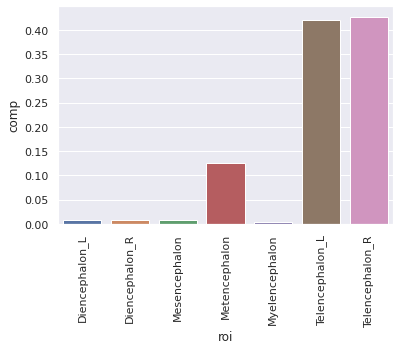

In [8]:
g = sns.barplot(x='roi', y = 'comp', data = summary)
## this is the matplotlib command for rotating 
## axis tick labels by 90 degrees.
plt.xticks(rotation = 90)

In [9]:
t1l1pivot = t1l1.pivot(index = 'id', columns = 'roi', values = 'volume')
t1l1pivot.head(4)

roi,Diencephalon_L,Diencephalon_R,Mesencephalon,Metencephalon,Myelencephalon,Telencephalon_L,Telencephalon_R
id,,,,,,,
127,9683,9678,10268,159402,4973,531111,543404
142,9156,9071,10516,165803,4912,545603,552216
239,8937,9004,9070,124504,4023,483107,490805
346,8828,8933,9788,135090,4428,558849,568830


In [12]:
#Unfortunately, seaborn doesn’t have a stakced bar chart. However, pandas does have one built in.
# To do this, however, we have to create a version of the data 
#with ROIs as the columns. This is done with a pivot statement.

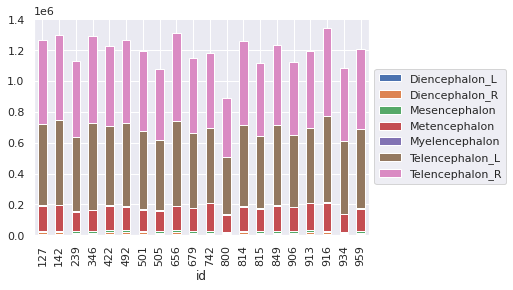

In [10]:
t1l1pivot.plot(kind='bar', stacked=True, legend= False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [13]:
#Let’s do some scatterplots. Let’s look at bilateral symmetry in the telencephalon.

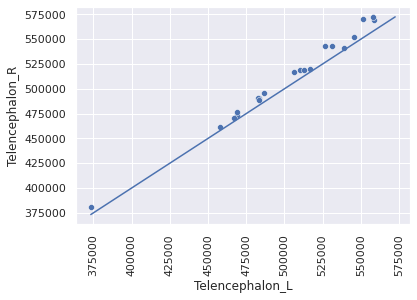

In [14]:
sns.scatterplot(x = 'Telencephalon_L', y = 'Telencephalon_R', data = t1l1pivot)
plt.xticks(rotation = 90)

#plot an identity line from the data min to the data max
x1 = min([t1l1pivot.Telencephalon_L.min(), t1l1pivot.Telencephalon_R.min()])
x2 = max([t1l1pivot.Telencephalon_L.max(), t1l1pivot.Telencephalon_R.max()])
plt.plot([x1, x2], [x1 , x2])

(array([12.8 , 12.85, 12.9 , 12.95, 13.  , 13.05, 13.1 , 13.15, 13.2 ,
        13.25, 13.3 ]), <a list of 11 Text major ticklabel objects>)

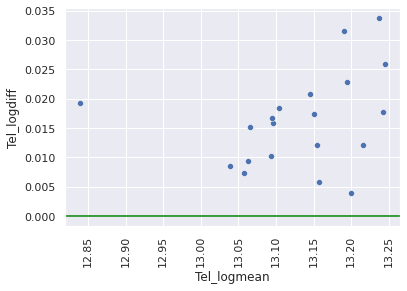

In [15]:
t1l1pivot = t1l1pivot.assign(Tel_logmean = lambda x: (np.log(x.Telencephalon_L) * .5 +  np.log(x.Telencephalon_R)* .5))
t1l1pivot = t1l1pivot.assign(Tel_logdiff = lambda x: (np.log(x.Telencephalon_R) -  np.log(x.Telencephalon_L)))
sns.scatterplot(x = 'Tel_logmean', y = 'Tel_logdiff', data = t1l1pivot)
plt.axhline(0, color='green')
plt.xticks(rotation = 90)